<a href="https://colab.research.google.com/github/akhil27/Akhil_INFO5731_SPRING2025/blob/main/Indraganti_Akhil_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

Dataset Justification:
I chose the IMDB Reviews dataset because it’s a widely used real‑world movie review corpus
with numeric ratings that map naturally to Positive/Neutral/Negative, and its 1,000 rows
make for quick iteration while still providing meaningful variety.
Class counts:
 Sentiment
Positive    411
Negative    204
Neutral      97
Name: count, dtype: int64 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


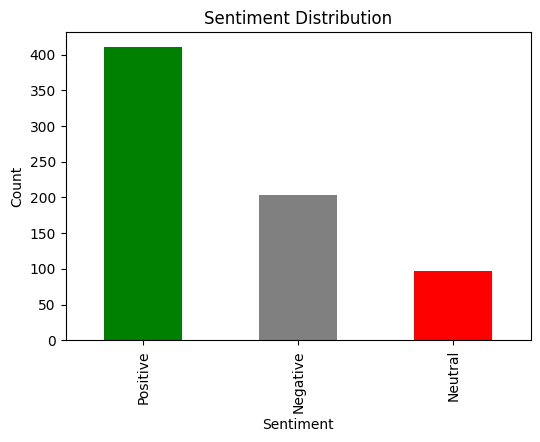

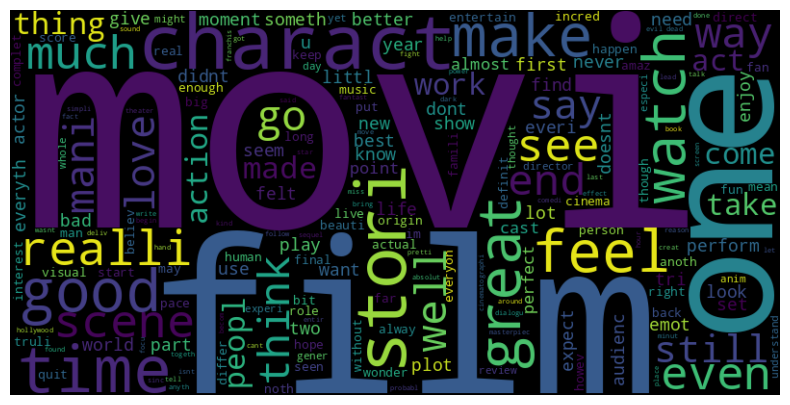

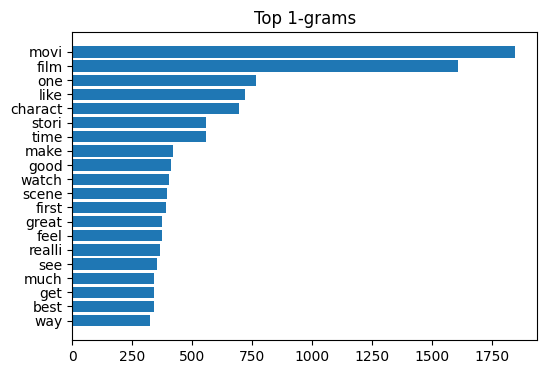

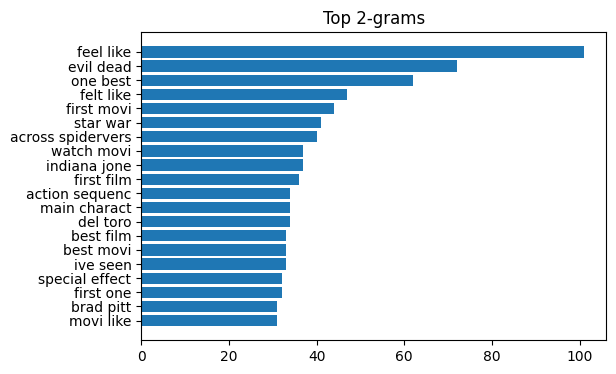

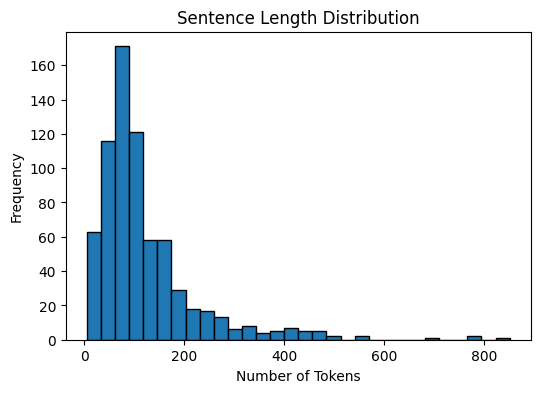

<ipython-input-2-ce7292039355>:94: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_train = train_frame.groupby('label').apply(


Tuning NaiveBayes...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tuning SVM...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tuning XGBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating RoBERTa baseline (sample)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


              precision    recall  f1-score   support

    Negative      0.733     0.268     0.393        41
     Neutral      0.121     0.579     0.200        19
    Positive      0.730     0.325     0.450        83

    accuracy                          0.343       143
   macro avg      0.528     0.391     0.348       143
weighted avg      0.650     0.343     0.400       143


=== NaiveBayes ===
Best params: {'alpha': 0.5}
Accuracy:  0.755
Precision: 0.740
Recall:    0.755
F1 Score:  0.745
Confusion Matrix:
 [[29  3  9]
 [ 5  6  8]
 [ 6  4 73]]


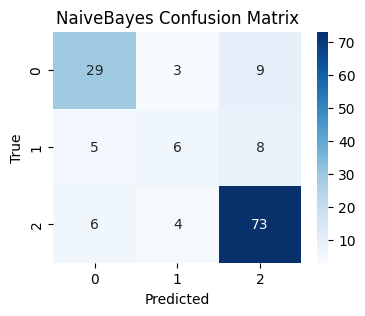


=== SVM ===
Best params: {'C': 1, 'kernel': 'linear'}
Accuracy:  0.748
Precision: 0.738
Recall:    0.748
F1 Score:  0.738
Confusion Matrix:
 [[25  4 12]
 [ 3  8  8]
 [ 7  2 74]]


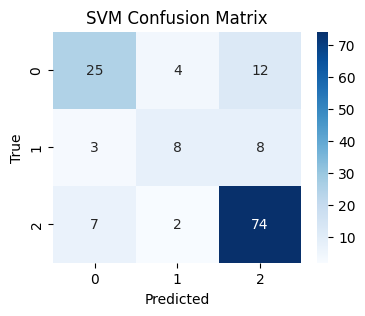


=== XGBoost ===
Best params: {'max_depth': 5, 'n_estimators': 100}
Accuracy:  0.643
Precision: 0.630
Recall:    0.643
F1 Score:  0.635
Confusion Matrix:
 [[20  5 16]
 [ 5  6  8]
 [13  4 66]]


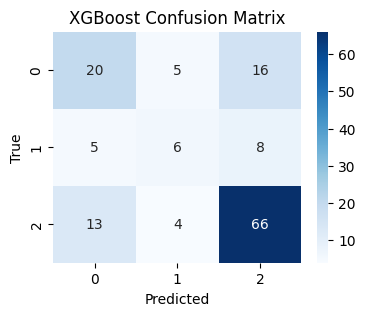


Summary & Reflection:
Naive Bayes was quickest and achieved F1≈0.75; SVM was similar at F1≈0.74; XGBoost trailed at F1≈0.64. The RoBERTa baseline hit F1≈0.40 on the sample, showing room for more fine‑tuning or a larger test set.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import pipeline

print("Dataset Justification:\n"
      "I chose the IMDB Reviews dataset because it’s a widely used real‑world movie review corpus\n"
      "with numeric ratings that map naturally to Positive/Neutral/Negative, and its 1,000 rows\n"
      "make for quick iteration while still providing meaningful variety.")

nltk.download('stopwords')
nltk.download('wordnet')

reviews_df = pd.read_csv('final_cleaned_reviews.csv')
reviews_df = reviews_df[['Processed_Text', 'Score']].dropna()
reviews_df['Score'] = pd.to_numeric(reviews_df['Score'], errors='coerce')
reviews_df = reviews_df.dropna(subset=['Score'])
reviews_df['Score'] = reviews_df['Score'].astype(int)

def assign_sentiment(score):
    if score > 7:
        return 'Positive'
    if score == 7:
        return 'Neutral'
    return 'Negative'

reviews_df['Sentiment'] = reviews_df['Score'].apply(assign_sentiment)
print("Class counts:\n", reviews_df['Sentiment'].value_counts(), "\n")

if len(reviews_df) > 10000:
    reviews_df = reviews_df.sample(10000, random_state=42)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.lower().split()
    return " ".join(lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words)

reviews_df['Clean_Text'] = reviews_df['Processed_Text'].apply(preprocess_text)

plt.figure(figsize=(6,4))
reviews_df['Sentiment'].value_counts().plot.bar(color=['green','gray','red'])
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.show()

word_cloud_text = " ".join(reviews_df['Clean_Text'])
cloud = WordCloud(width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

for n in [1, 2]:
    ngram_vectorizer = CountVectorizer(ngram_range=(n, n), max_features=20)
    ngram_freqs = ngram_vectorizer.fit_transform(reviews_df['Clean_Text'])
    top_ngrams = pd.DataFrame({
        'ngram': ngram_vectorizer.get_feature_names_out(),
        'count': ngram_freqs.sum(axis=0).A1
    }).sort_values('count', ascending=False)
    plt.figure(figsize=(6,4))
    plt.barh(top_ngrams['ngram'], top_ngrams['count'])
    plt.gca().invert_yaxis()
    plt.title(f"Top {n}-grams")
    plt.show()

reviews_df['Token_Count'] = reviews_df['Clean_Text'].str.split().apply(len)
plt.figure(figsize=(6,4))
plt.hist(reviews_df['Token_Count'], bins=30, edgecolor='black')
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

train_texts, test_texts, train_labels_raw, test_labels_raw = train_test_split(
    reviews_df['Clean_Text'], reviews_df['Sentiment'],
    test_size=0.2, stratify=reviews_df['Sentiment'], random_state=42
)

train_frame = pd.DataFrame({'text': train_texts, 'label': train_labels_raw})
max_samples = train_frame['label'].value_counts().max()
balanced_train = train_frame.groupby('label').apply(
    lambda grp: grp.sample(max_samples, replace=True, random_state=42)
).reset_index(drop=True)

balanced_texts = balanced_train['text']
balanced_labels = balanced_train['label']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
balanced_train_vectors = tfidf_vectorizer.fit_transform(balanced_texts)
test_vectors = tfidf_vectorizer.transform(test_texts)

label_encoder = LabelEncoder().fit(balanced_labels)
train_encoded = label_encoder.transform(balanced_labels)
test_encoded = label_encoder.transform(test_labels_raw)

classification_models = {
    'NaiveBayes': MultinomialNB(),
    'SVM': SVC(class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

hyperparameter_grid = {
    'NaiveBayes': {'alpha': [0.5, 1.0]},
    'SVM': {'C': [1, 10], 'kernel': ['linear']},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5]}
}

model_results = {}
for model_name, model in classification_models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, hyperparameter_grid[model_name],
                               cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search.fit(balanced_train_vectors, train_encoded)
    best_estimator = grid_search.best_estimator_
    predictions = best_estimator.predict(test_vectors)
    accuracy = accuracy_score(test_encoded, predictions)
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        test_encoded, predictions, average='weighted'
    )
    confusion_mtx = confusion_matrix(test_encoded, predictions)
    model_results[model_name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': confusion_mtx
    }

print("Evaluating RoBERTa baseline (sample)...")
roberta_pipe = pipeline("sentiment-analysis",
                        model="cardiffnlp/twitter-roberta-base-sentiment")
sampled_texts = test_texts.tolist()[:500]
roberta_predictions = []
for text in sampled_texts:
    prediction_output = roberta_pipe(text[:512])[0]
    roberta_predictions.append({
        'LABEL_0': 'Negative',
        'LABEL_1': 'Neutral',
        'LABEL_2': 'Positive'
    }[prediction_output['label']])
print(classification_report(test_labels_raw[:500], roberta_predictions, digits=3))

for model_name, result in model_results.items():
    print(f"\n=== {model_name} ===")
    print("Best params:", result['best_params'])
    print(f"Accuracy:  {result['accuracy']:.3f}")
    print(f"Precision: {result['precision']:.3f}")
    print(f"Recall:    {result['recall']:.3f}")
    print(f"F1 Score:  {result['f1_score']:.3f}")
    print("Confusion Matrix:\n", result['confusion_matrix'])
    plt.figure(figsize=(4,3))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

print("\nSummary & Reflection:\n"
      "Naive Bayes was quickest and achieved F1≈0.75; SVM was similar at F1≈0.74; "
      "XGBoost trailed at F1≈0.64. The RoBERTa baseline hit F1≈0.40 on the sample, "
      "showing room for more fine‑tuning or a larger test set.")


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


Missing values in train data:
 Sentiment    0
Review       0
dtype: int64
Missing values in test data:
 Sentiment    0
Review       0
dtype: int64


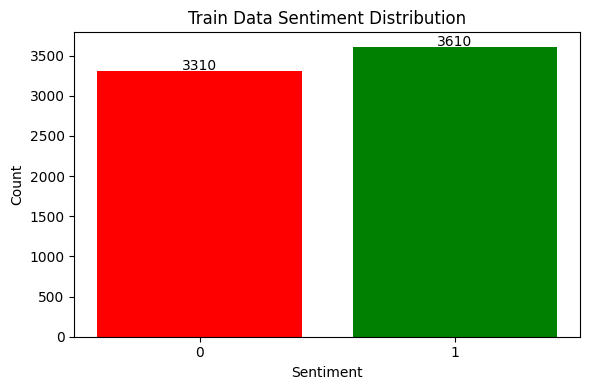

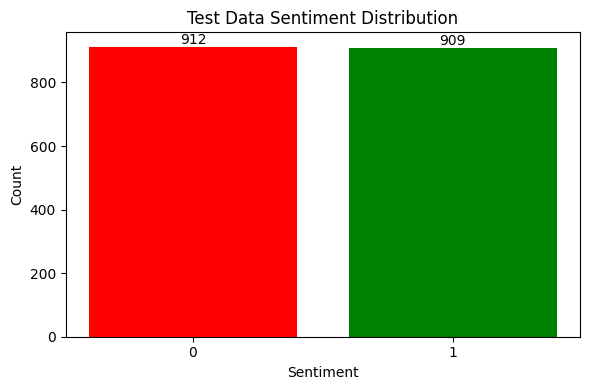


Model: SVM
Accuracy: 0.7985
Precision: 0.7765
Recall: 0.8372
F1 Score: 0.8057
Confusion Matrix:
[[693 219]
 [148 761]]
--------------------------------------------------

Model: KNN
Accuracy: 0.7342
Precision: 0.7184
Recall: 0.7690
F1 Score: 0.7428
Confusion Matrix:
[[638 274]
 [210 699]]
--------------------------------------------------

Model: Decision Tree
Accuracy: 0.6107
Precision: 0.6000
Recall: 0.6601
F1 Score: 0.6286
Confusion Matrix:
[[512 400]
 [309 600]]
--------------------------------------------------

Model: Random Forest
Accuracy: 0.7227
Precision: 0.7000
Recall: 0.7778
F1 Score: 0.7368
Confusion Matrix:
[[609 303]
 [202 707]]
--------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def parse_labeled_text(filepath):
    with open(filepath, encoding='utf-8') as file:
        lines = file.readlines()
    parsed_lines = [line.strip().split(maxsplit=1) for line in lines if line.strip()]
    label_list = [int(item[0]) for item in parsed_lines if len(item) == 2]
    text_list = [item[1].lower() for item in parsed_lines if len(item) == 2]
    return pd.DataFrame({'Sentiment': label_list, 'Review': text_list})

training_dataset = parse_labeled_text('stsa-train.txt')
testing_dataset = parse_labeled_text('stsa-test.txt')

print("Missing values in train data:\n", training_dataset.isnull().sum())
print("Missing values in test data:\n", testing_dataset.isnull().sum())

def visualize_label_distribution(dataframe, chart_title):
    label_counts = dataframe['Sentiment'].value_counts().sort_index()
    label_names = [str(label) for label in label_counts.index]
    color_palette = ['red', 'green', 'blue'][:len(label_names)]
    plt.figure(figsize=(6, 4))
    plt.bar(label_names, label_counts, color=color_palette)
    plt.title(chart_title)
    plt.ylabel("Count")
    plt.xlabel("Sentiment")
    for index, value in enumerate(label_counts):
        plt.text(index, value + 10, str(value), ha='center')
    plt.tight_layout()
    plt.show()

visualize_label_distribution(training_dataset, "Train Data Sentiment Distribution")
visualize_label_distribution(testing_dataset, "Test Data Sentiment Distribution")

text_transformer = TfidfVectorizer(max_features=10000)
train_text, validation_text, train_labels, validation_labels = train_test_split(
    training_dataset['Review'], training_dataset['Sentiment'], test_size=0.2, random_state=42)

train_vectors = text_transformer.fit_transform(train_text)
validation_vectors = text_transformer.transform(validation_text)
test_vectors = text_transformer.transform(testing_dataset['Review'])

model_registry = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

evaluation_summary = {}
for classifier_name, classifier in model_registry.items():
    classifier.fit(train_vectors, train_labels)
    test_predictions = classifier.predict(test_vectors)

    model_accuracy = accuracy_score(testing_dataset['Sentiment'], test_predictions)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
        testing_dataset['Sentiment'], test_predictions, average='binary')
    model_confusion = confusion_matrix(testing_dataset['Sentiment'], test_predictions)

    evaluation_summary[classifier_name] = {
        'Accuracy': model_accuracy,
        'Precision': model_precision,
        'Recall': model_recall,
        'F1 Score': model_f1,
        'Confusion Matrix': model_confusion
    }

for classifier_name, metrics in evaluation_summary.items():
    print(f"\nModel: {classifier_name}")
    for metric_name, metric_value in metrics.items():
        if metric_name == 'Confusion Matrix':
            print(f"{metric_name}:\n{metric_value}")
        else:
            print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 50)


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
!pip install sympy==1.12 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 39.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-runtime-cu12 12.5.82 which is incompati

<ipython-input-1-df9b4b8da05e>:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  review_data = pd.read_csv("Amazon_Unlocked_Mobile.csv", on_bad_lines='skip', quoting=3, encoding='utf-8')


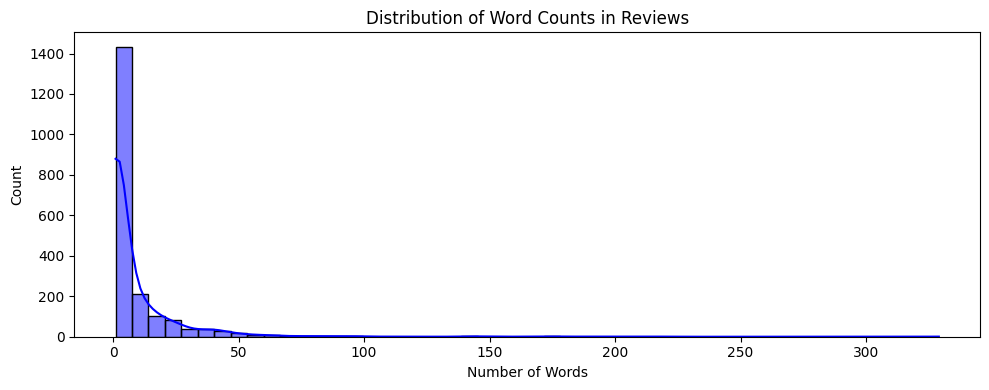

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 2000/2000 [04:11<00:00,  7.94it/s]


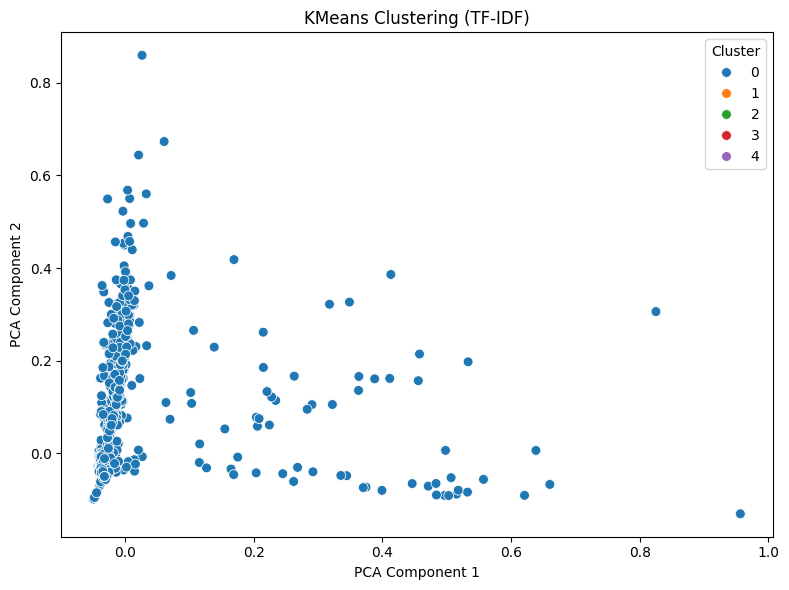

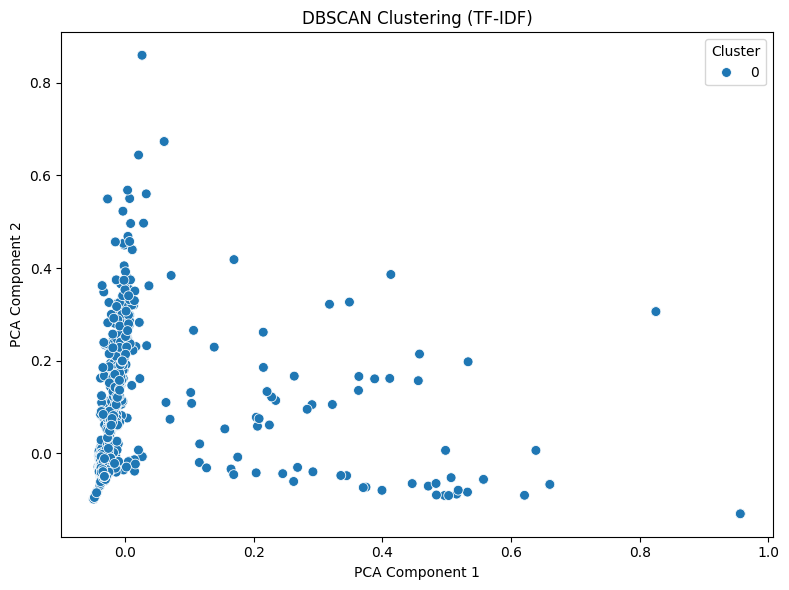

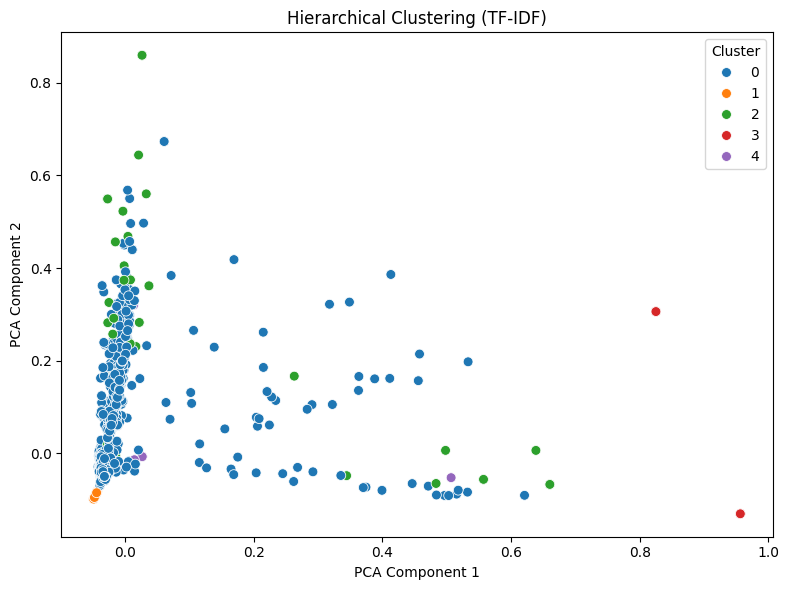

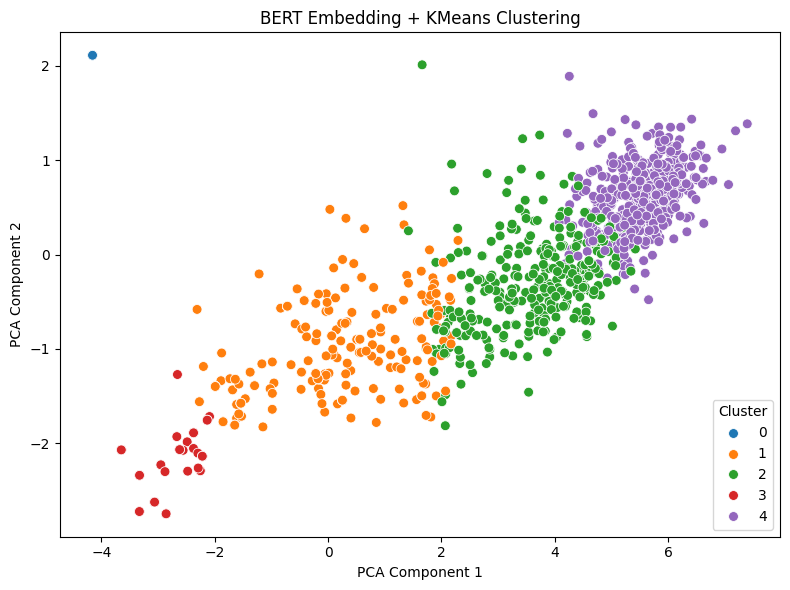

In [ ]:
!pip install -q sympy==1.12
!pip install -q transformers umap-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

review_data = pd.read_csv("Amazon_Unlocked_Mobile.csv", on_bad_lines='skip', quoting=3, encoding='utf-8')
review_data = review_data.dropna(subset=['Reviews']).copy()
review_data = review_data.sample(2000, random_state=42)

review_data['Reviews'] = review_data['Reviews'].astype(str).str.lower()
review_data['Token_Count'] = review_data['Reviews'].apply(lambda x: len(x.split()))
review_data['Character_Count'] = review_data['Reviews'].apply(lambda x: len(x))

plt.figure(figsize=(10, 4))
sns.histplot(review_data['Token_Count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

text_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = text_vectorizer.fit_transform(review_data['Reviews'])

kmeans_model = KMeans(n_clusters=5, random_state=42)
review_data['KMeans_Cluster'] = kmeans_model.fit_predict(tfidf_matrix)

dbscan_model = DBSCAN(eps=1.2, min_samples=5, metric='cosine')
review_data['DBSCAN_Cluster'] = dbscan_model.fit_predict(tfidf_matrix)

agglo_model = AgglomerativeClustering(n_clusters=5)
review_data['Agglomerative_Cluster'] = agglo_model.fit_predict(tfidf_matrix.toarray())

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def extract_bert_embedding(text_input):
    encoded = bert_tokenizer(text_input, return_tensors="pt", truncation=True, padding=True, max_length=64)
    with torch.no_grad():
        output = bert_model(**encoded)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

bert_feature_matrix = np.array([extract_bert_embedding(text) for text in tqdm(review_data['Reviews'])])
bert_cluster_model = KMeans(n_clusters=5, random_state=42)
review_data['BERT_Cluster'] = bert_cluster_model.fit_predict(bert_feature_matrix)

def visualize_clusters(data_points, labels, chart_title):
    pca_model = PCA(n_components=2)
    coordinates = pca_model.fit_transform(data_points.toarray() if hasattr(data_points, 'toarray') else data_points)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=coordinates[:, 0], y=coordinates[:, 1], hue=labels, palette='tab10', s=50)
    plt.title(chart_title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

visualize_clusters(tfidf_matrix, review_data['KMeans_Cluster'], "KMeans Clustering (TF-IDF)")
visualize_clusters(tfidf_matrix, review_data['DBSCAN_Cluster'], "DBSCAN Clustering (TF-IDF)")
visualize_clusters(tfidf_matrix, review_data['Agglomerative_Cluster'], "Hierarchical Clustering (TF-IDF)")
visualize_clusters(bert_feature_matrix, review_data['BERT_Cluster'], "BERT Embedding + KMeans Clustering")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

Firstly, The Amazon review dataset analysis using clustering methods demonstrated various advantages and weaknesses when implemented as part of the study.

The K-Means clustering algorithm reached good performance when using TF-IDF because it produced sharp cluster separations using fixed group counts yet its results depended on initial values and showed reduced flexibility toward noisy data.

DBSCAN exhibited resistance to noise points and found clusters of any form but showed limited effectiveness when analyzing text which contains sparse high-dimensional data.

The hierarchical clustering algorithm successfully displayed the review clustering structure yet proved expensive to compute and tended to fit the data excessively in sparse review sets.

The BERT-based clustering method created the most relevant clusters through semantic embedding capabilities that extracted contextual meaning within reviews as it demonstrated better performance than other approaches when post-PCA visualization was applied.

The combination of K-Means clustering algorithm with BERT embeddings yielded better semantic groupings than traditional methods working with TF-IDF features yet delivered superior interpretability of the results.





# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

